In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import time
from google.colab import files
%matplotlib inline

In [ ]:

uploaded = files.upload()

Saving traindata.csv to traindata.csv


In [ ]:
A = pd.read_csv("traindata.csv")
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     210 non-null    float64
 1   x_2     210 non-null    float64
 2   y       210 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.0 KB


In [ ]:
A.describe()

,x_1,x_2,y
count,210.000000,210.000000,210.000000
mean,-0.044254,0.037997,-0.171429
std,2.934098,2.883191,0.987551
min,-7.938368,-8.844923,-1.000000
25%,-1.610032,-1.503084,-1.000000
50%,-0.175592,0.232527,-1.000000
75%,1.681800,1.582602,1.000000
max,7.265405,9.750874,1.000000


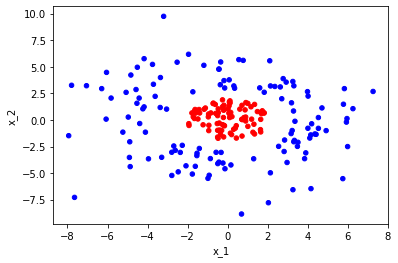

In [ ]:
A.plot.scatter(x="x_1",y="x_2",c=["r" if e==1 else "b" for e in A.y])

In [ ]:
X = scale(A.loc[:,["x_1","x_2"]])

In [ ]:
learning_rate=0.1

In [ ]:
import torch

Xtensor = torch.tensor(X.astype(np.float32))
ytensor = torch.tensor(A.y.replace(-1,0).astype(np.float32)).unsqueeze(-1) # les etiquettes de classe sont 0, 1

since = time.time()
# Le perceptron multicouche
model = torch.nn.Sequential(
    torch.nn.Linear(2, 3), # la couche cachée
    torch.nn.ReLU(),
    torch.nn.Linear(3, 1), # la couche de sortie
    torch.nn.Sigmoid()
)

# la fonction de perte : entropie croisée pour classif binaire
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

loss_descent = []

for t in range(5000):
    y_pred = model(Xtensor) # forward pass
    loss = criterion(y_pred, ytensor)
    
    if t % 1000 == 999:
        print(t, loss.item())
        loss_descent.append([t, loss.item()])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
time_elapsed = time.time() - since
print('Le temps d"execution est de : ',time_elapsed)

999 0.04288559779524803
1999 0.025738002732396126
2999 0.019905583932995796
3999 0.016715889796614647
4999 0.014609652571380138
Le temps d"execution est de :  2.4185376167297363
